## Import Modul

In [1]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv("C:/Users/Kuncoro/Documents/python/weatherAUS.csv")

In [3]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

In [5]:
dataset.apply(lambda column: sum(column.isnull()))

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

## Remove Null

In [6]:
dataset = dataset.dropna()

In [7]:
dataset.apply(lambda column: sum(column.isnull()))

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 5939 to 139112
Data columns (total 24 columns):
Date             56420 non-null object
Location         56420 non-null object
MinTemp          56420 non-null float64
MaxTemp          56420 non-null float64
Rainfall         56420 non-null float64
Evaporation      56420 non-null float64
Sunshine         56420 non-null float64
WindGustDir      56420 non-null object
WindGustSpeed    56420 non-null float64
WindDir9am       56420 non-null object
WindDir3pm       56420 non-null object
WindSpeed9am     56420 non-null float64
WindSpeed3pm     56420 non-null float64
Humidity9am      56420 non-null float64
Humidity3pm      56420 non-null float64
Pressure9am      56420 non-null float64
Pressure3pm      56420 non-null float64
Cloud9am         56420 non-null float64
Cloud3pm         56420 non-null float64
Temp9am          56420 non-null float64
Temp3pm          56420 non-null float64
RainToday        56420 non-null object
RISK_MM      

In [9]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
5939,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,0.0,No
5940,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,0.0,No
5942,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,0.0,No
5943,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,0.0,No
5944,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,0.0,No


## Change Datetime

In [10]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [11]:
dataset['Year'] = dataset['Date'].dt.year

In [12]:
dataset['Month'] = dataset['Date'].dt.month

In [13]:
dataset['Day'] = dataset['Date'].dt.day

In [14]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
5939,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,2.0,5.0,26.6,33.4,No,0.0,No,2009,1,1
5940,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,1.0,1.0,20.3,27.0,No,0.0,No,2009,1,2
5942,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,1.0,6.0,28.7,34.9,No,0.0,No,2009,1,4
5943,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,1.0,5.0,29.1,35.6,No,0.0,No,2009,1,5
5944,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,1.0,6.0,33.6,37.6,No,0.0,No,2009,1,6


## EDA

In [15]:
dataset.RainTomorrow.value_counts()

No     43993
Yes    12427
Name: RainTomorrow, dtype: int64

Text(0.5, 1.0, 'Rain Tomorrow in AUS')

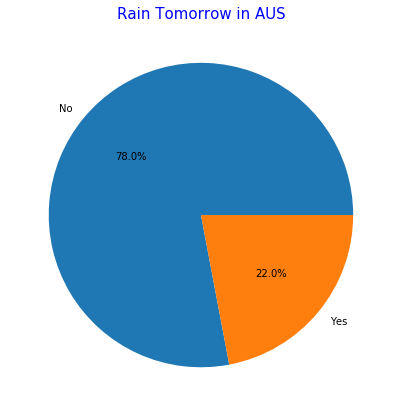

In [16]:
labels = dataset.RainTomorrow.value_counts().index
explode = (0,0)
sizes = dataset.RainTomorrow.value_counts().values

#visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')
plt.title('Rain Tomorrow in AUS', color = 'blue',fontsize = 15)

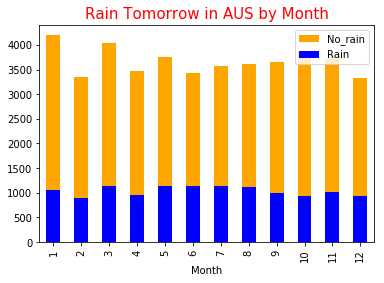

In [17]:
rain_month = dataset[dataset['RainTomorrow'] == 'Yes'].groupby('Month')['RainTomorrow'].count()
no_rain_month = dataset[dataset['RainTomorrow'] == 'No'].groupby('Month')['RainTomorrow'].count()
no_rain_month.plot(kind='bar', color='orange', label='No_rain')
rain_month.plot(kind='bar', color='blue', label='Rain')
plt.title('Rain Tomorrow in AUS by Month', color = 'red',fontsize = 15)
plt.legend(loc=1)

Text(0.5, 1.0, 'Rain Tomorrow in AUS by Year')

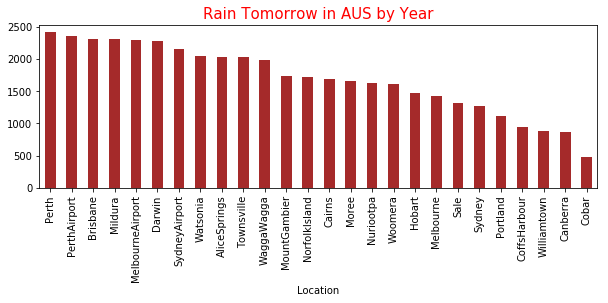

In [18]:
plt.figure(figsize=(10,3))
rain_Location = dataset[dataset['RainTomorrow'] == 'No'].groupby('Location')['RainTomorrow'].count().sort_values(ascending=False)
rain_Location.plot(kind='bar',colors='brown')
plt.title('Rain Tomorrow in AUS by Year', color = 'red',fontsize = 15)

Text(0.5, 1.0, 'No Rain Tomorrow in AUS by Year')

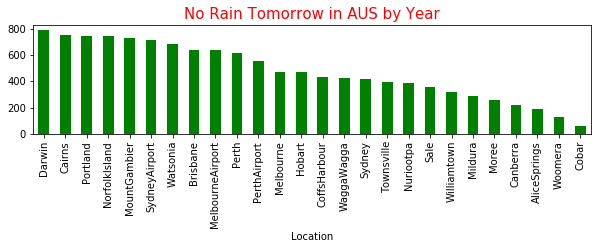

In [19]:
plt.figure(figsize=(10,2))
no_rain_location = dataset[dataset['RainTomorrow'] == 'Yes'].groupby('Location')['RainTomorrow'].count().sort_values(ascending=False)
no_rain_location.plot(kind='bar',colors='green')
plt.title('No Rain Tomorrow in AUS by Year', color = 'red',fontsize = 15)

In [20]:
dataset.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow', 'Year', 'Month',
       'Day'],
      dtype='object')

## PREDICTION RAIN TOMORROW

In [21]:
dataset = dataset[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
        'Sunshine', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow']].reset_index(drop=True)


In [22]:
dataset.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
1,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
2,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
3,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
4,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No


## Membuat colom baru 

In [23]:
dataset['RainToday'] = 'Today_' + dataset['RainToday'].astype(str)  

today = pd.get_dummies(dataset['RainToday'])  
weather = dataset.join(today)


In [24]:
weather = weather.drop(['RainToday'], axis=1)

In [25]:
weather.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,Today_No,Today_Yes
0,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,1,0
1,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,1,0
2,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,1,0
3,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,1,0
4,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,1,0


In [26]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 19 columns):
MinTemp          56420 non-null float64
MaxTemp          56420 non-null float64
Rainfall         56420 non-null float64
Evaporation      56420 non-null float64
Sunshine         56420 non-null float64
WindGustSpeed    56420 non-null float64
WindSpeed9am     56420 non-null float64
WindSpeed3pm     56420 non-null float64
Humidity9am      56420 non-null float64
Humidity3pm      56420 non-null float64
Pressure9am      56420 non-null float64
Pressure3pm      56420 non-null float64
Cloud9am         56420 non-null float64
Cloud3pm         56420 non-null float64
Temp9am          56420 non-null float64
Temp3pm          56420 non-null float64
RainTomorrow     56420 non-null object
Today_No         56420 non-null uint8
Today_Yes        56420 non-null uint8
dtypes: float64(16), object(1), uint8(2)
memory usage: 7.4+ MB


## Merubah Column RainTomorrow ke Number 

In [27]:
weather.RainTomorrow.replace(('Yes', 'No'), (1, 0), inplace=True)

In [28]:
weather.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,Today_No,Today_Yes
0,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,1,0
1,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,1,0
2,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,1,0
3,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,1,0
4,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,1,0


In [29]:
weather_of_AUS = len(weather)
number_of_rain = len(weather[weather['RainTomorrow'] == 1])
number_of_no_rain = len(weather[weather['RainTomorrow'] == 0])
print('Number of Weater in AUS', weather_of_AUS)
print('Number of rain :%d (%.2f %%)' % (number_of_rain,number_of_rain/weather_of_AUS*100))
print('Number of no rain :%d (%.2f %%)' % (number_of_no_rain,number_of_no_rain/weather_of_AUS*100))

Number of Weater in AUS 56420
Number of rain :12427 (22.03 %)
Number of no rain :43993 (77.97 %)


In [30]:
correlation = weather.corr() ## corelasi data

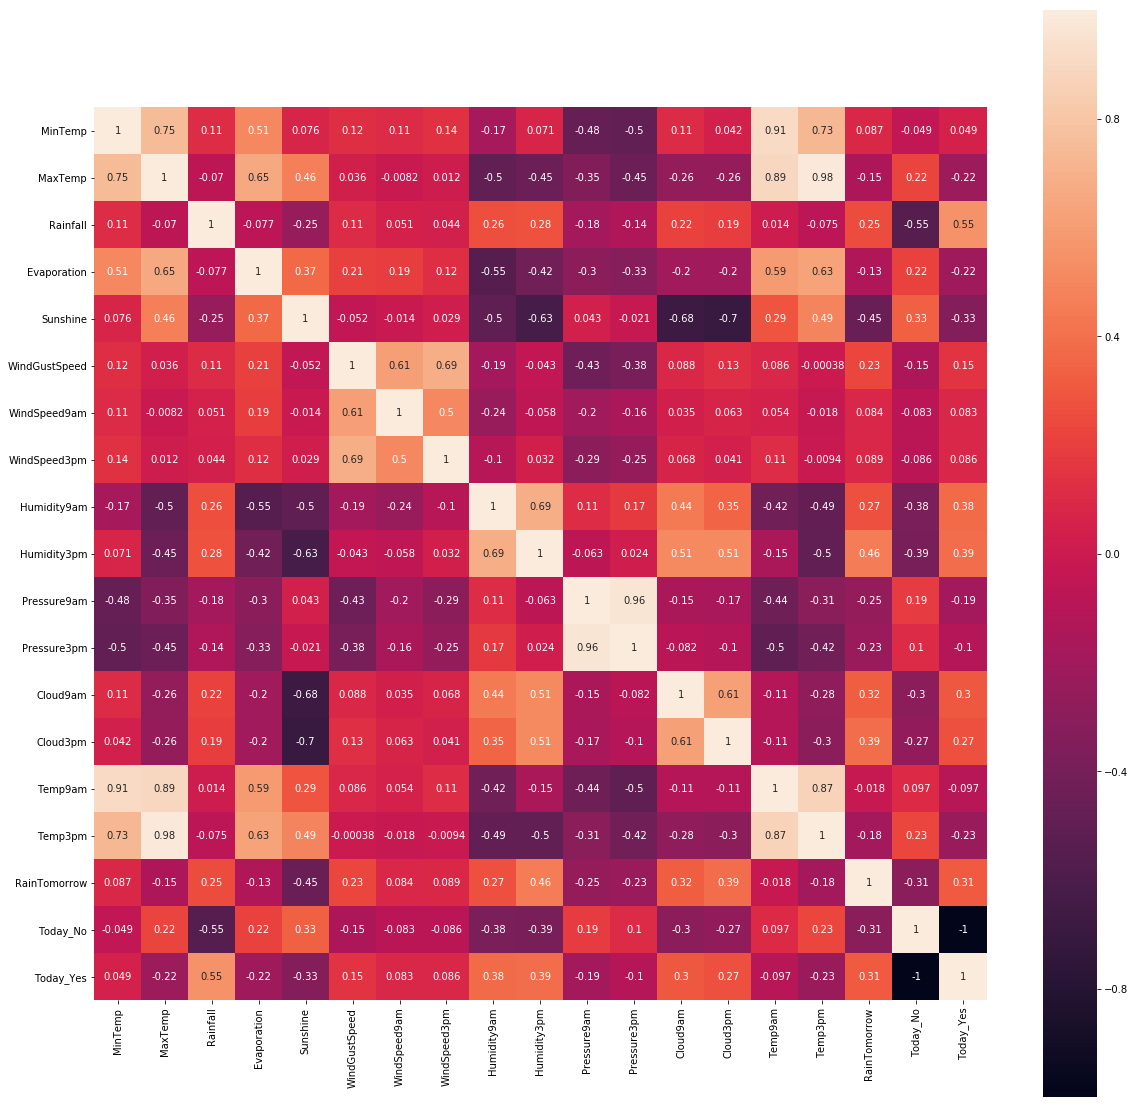

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation, square=True, annot=True)

## Split Data

In [32]:
# from sklearn.model_selection import train_test_split

In [33]:
# df = weather_AUS_Tomorrow.drop(['RainTomorrow'], axis=1)

In [34]:
# target = weather_AUS_Tomorrow['RainTomorrow']

In [35]:
# X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.35)

In [36]:
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [37]:
train, test, validate = np.split(weather.sample(frac=1), [int(.6*len(weather)), int(.8*len(weather))])
print(train.shape, test.shape, validate.shape)

(33852, 19) (11284, 19) (11284, 19)


In [38]:
y_train = train['RainTomorrow']
x_train = train.drop(['RainTomorrow'], axis=1)
y_test = test['RainTomorrow']
x_test = test.drop(['RainTomorrow'], axis=1)
y_validate = validate['RainTomorrow']
x_validate = validate.drop(['RainTomorrow'], axis=1)

In [39]:
y_test.mean()

0.22252747252747251

In [40]:
y_train.mean()

0.2184804442868959

## Feature Importances

In [41]:
rf = RandomForestClassifier() #mencacri corelasi yang paling bagus dr left
rf.fit(x_train, y_train)
print('Feature sorted by their score: ')
print(sorted(zip(map(lambda x : round(x,4), rf.feature_importances_),x_train),reverse=True))

Feature sorted by their score: 
[(0.1922, 'Humidity3pm'), (0.1074, 'Sunshine'), (0.0708, 'Pressure3pm'), (0.0652, 'Pressure9am'), (0.0574, 'WindGustSpeed'), (0.0564, 'Cloud3pm'), (0.0544, 'Humidity9am'), (0.047, 'Temp3pm'), (0.0467, 'MinTemp'), (0.0465, 'Temp9am'), (0.0462, 'MaxTemp'), (0.0441, 'Evaporation'), (0.0418, 'Rainfall'), (0.0357, 'WindSpeed9am'), (0.0351, 'WindSpeed3pm'), (0.0338, 'Cloud9am'), (0.0161, 'Today_No'), (0.003, 'Today_Yes')]


In [42]:
all_vars = x_train.columns.tolist()
top_2_vars = ['Humidity3pm','Sunshine','Pressure3pm','Pressure9am','WindGustSpeed']
bottom_vars = [cols for cols in all_vars if cols not in top_2_vars]

x_train = x_train.drop(bottom_vars,axis=1)
x_test = x_test.drop(bottom_vars,axis=1)

## LOGISTIC Regresion

In [43]:
logit_model = LogisticRegression()
logit_model = logit_model.fit(x_train, y_train)
predicted = pd.DataFrame(logit_model.predict(x_test))
metrics.accuracy_score(y_test, predicted) ## HOLD OUT

0.848369372562921

In [44]:
rf_cv_scores = cross_validate(LogisticRegression(), x_test, y_test, cv=10, scoring='accuracy') #CROSS VALIDATE
np.mean(rf_cv_scores['test_score'])

0.8486357966155552

## RANDOM FORREST

In [45]:
randomF = RandomForestClassifier()
randomF_model = randomF.fit(x_train, y_train)
randomF_model.score(x_train,y_train) 
predicted = pd.DataFrame(randomF_model.predict(x_test))
metrics.accuracy_score(y_test, predicted) ## HOLD OUT

0.837025877348458

In [46]:
randomF_cv_scores = cross_validate(RandomForestClassifier(), x_test, y_test, cv=10, scoring='accuracy') #CROSS VALIDATE
np.mean(randomF_cv_scores['test_score'])

0.8407509835389636

## k-NN

In [47]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
knn_model.score(x_train,y_train) 
predicted = pd.DataFrame(knn_model.predict(x_test))
metrics.accuracy_score(y_test, predicted ) ## HOLD OUT

0.8307337823466856

In [48]:
knn_cv_scores = cross_validate(KNeighborsClassifier(), x_test, y_test, cv=10, scoring='accuracy') #CROSS VALIDATE
np.mean(knn_cv_scores['test_score'])

0.834900626416298

## NEW DATA RAIN TOMORROW

In [49]:
x_train.head(1)

,Sunshine,WindGustSpeed,Humidity3pm,Pressure9am,Pressure3pm
45841,5.0,31.0,50.0,1027.0,1023.0


In [50]:
new_data = pd.DataFrame.from_dict({
    'Sunshine':[0.3],
    'WindGustSpeed':[11.6],
    'Humidity3pm':[43.0],
    'Pressure9am':[100.7],
    'Pressure3pm':[100.0]
})
knn_model.predict(new_data)

array([1], dtype=int64)